### 先训练一个基础的XGBoost模型，然后使用网格搜索调参。

In [100]:
import pandas as pd # type: ignore
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 显示所有列
pd.set_option('display.max_columns', None)
# # 显示所有行
pd.set_option('display.max_rows', None) 
df = pd.read_csv('..\Data\data1.csv') # 请确保文件路径正确
features = df.columns.tolist() 
# 除去最后一列
features = features[:-1]
features

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24']

In [101]:

# # 假设 df 是你的德国信用数据集 DataFrame
# # target 是目标变量（违约与非违约）
# # features 是所有的特征列表

# # 分箱和计算 WOE
# def calc_woe_iv(df, feature, target):
#     # 创建分箱
#     df[feature + '_bin'] = pd.qcut(df[feature], 10, duplicates='drop')
#     bins = df[feature + '_bin'].unique()
    
#     # 计算 WOE 和 IV
#     woe_dict = {}
#     iv = 0
#     for b in bins:
#         bin_data = df[df[feature + '_bin'] == b]
#         total = len(bin_data)
#         bad = bin_data[target].sum()
#         good = total - bad
#         bad_rate = bad / total
#         good_rate = good / total
#         woe = np.log((good_rate + 0.0001) / (bad_rate + 0.0001))
#         iv += (good_rate - bad_rate) * woe
#         woe_dict[b] = woe
    
#     return woe_dict, iv

# # 替换特征为 WOE
# for feature in features:
#     woe_dict, iv = calc_woe_iv(df, feature, 'Y(1=default, 0=non-default)')
#     df[feature + '_woe'] = df[feature + '_bin'].map(woe_dict)
    
# # 筛选重要特征
# important_features = [feature for feature in features if calc_woe_iv(df, feature, 'Y(1=default, 0=non-default)')[1] > 0.5]
# important_features

In [102]:


#1. 加载数据
df = pd.read_csv('..\Data\data1.csv') # 请确保文件路径正确

#2. 数据预处理
X = df.drop('Y(1=default, 0=non-default)', axis=1) # 假设'Target'是目标变量
# X = df[important_features]
y = df['Y(1=default, 0=non-default)']

#处理类别变量
X = pd.get_dummies(X, drop_first=True)

#3. 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#4. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ## 在xgboost的基础上添加SMOTE对少数样本进行过采样，以解决正负样本不均衡问题
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)


#5. 训练XGBoost模型
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

#6. 评估模型性能
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.8235364827503306


In [103]:
# 假设X是特征，y是标签（0或1）
dtrain = xgboost.DMatrix(X_train, label=y_train)

params = {
    'objective': 'binary:logistic',  # 二元分类
    'eval_metric': 'auc',
    # 其他参数...
}

model = xgboost.train(params, dtrain, num_boost_round=100)
dtest = xgboost.DMatrix(X_test)
# 这将返回违约的概率
probabilities = model.predict(dtest)
def probability_to_score(prob):
    # 这只是一个示例转换，您可能需要根据具体情况调整
    return int(300 + (1 - prob) * 550)

credit_scores = [probability_to_score(p) for p in probabilities]
credit_scores

[338,
 399,
 311,
 822,
 849,
 672,
 848,
 625,
 842,
 822,
 823,
 402,
 847,
 306,
 309,
 802,
 840,
 846,
 417,
 837,
 843,
 723,
 849,
 849,
 848,
 391,
 580,
 558,
 792,
 831,
 835,
 777,
 472,
 839,
 833,
 831,
 585,
 845,
 820,
 354,
 733,
 848,
 640,
 848,
 846,
 831,
 799,
 841,
 756,
 529,
 524,
 849,
 733,
 416,
 839,
 806,
 843,
 535,
 333,
 840,
 753,
 465,
 805,
 849,
 481,
 800,
 847,
 772,
 357,
 838,
 367,
 831,
 799,
 662,
 822,
 365,
 552,
 807,
 714,
 616,
 676,
 459,
 849,
 624,
 849,
 488,
 302,
 312,
 842,
 849,
 780,
 842,
 300,
 375,
 849,
 843,
 808,
 613,
 311,
 462,
 849,
 612,
 698,
 848,
 847,
 807,
 787,
 647,
 848,
 317,
 311,
 797,
 823,
 842,
 810,
 824,
 560,
 824,
 820,
 739,
 752,
 738,
 839,
 770,
 519,
 527,
 381,
 846,
 840,
 837,
 810,
 839,
 616,
 835,
 741,
 526,
 375,
 807,
 800,
 763,
 511,
 760,
 374,
 849,
 845,
 304,
 582,
 807,
 359,
 323,
 847,
 607,
 845,
 801,
 849,
 725,
 791,
 689,
 496,
 692,
 351,
 845,
 568,
 315,
 625,
 720,
 848

### 数据观察
#### x1,x3,x5,x6,x7,x8,x9,x11,x12是非二值离散型特征，且可能存在有序关系，进行标签编码
#### x2,x4,x10是连续型特征，且可能与年龄相关，依据最值进行分段后，进行标签编码
#### x13,x14,x15为1或2，转化为0/1二值特征；x16-24是二值特征，直接使用

## 添加SMOTE对少数样本进行过采样，以解决正负样本不均衡问题

### 基于训练后模型评估的结果构建一个评分体系

In [104]:
# 7. 构建评分卡
def create_scorecard(model, feature_names, base_score=600, pdo=20, odds=50):
    # 获取特征重要性
    feature_importance = model.feature_importances_
    
    # 计算评分卡参数
    factor = pdo / np.log(2)
    offset = base_score - factor * np.log(odds)
    
    # 计算每个特征的得分
    scores = {}
    for feature, importance in zip(feature_names, feature_importance):
        score = round(offset + factor * np.log(importance + 1e-6))  # 加一个小数以避免log(0)
        scores[feature] = score
    
    return scores

# 创建评分卡
scorecard = create_scorecard(xgb, X.columns)

# 8. 计算信用得分
# 修改后的 calculate_credit_score 函数
def calculate_credit_score(X, scorecard):
    scores = np.zeros(X.shape[0])
    for feature, score in scorecard.items():
        if feature in X.columns:
            scores += X[feature].values * score
    return scores


# 在计算信用得分时，使用原始的 X（未标准化的数据）
# credit_scores = calculate_credit_score(X, scorecard)

# 9. 将信用得分添加到原始数据框中
df['Credit_Score'] = credit_scores


ValueError: Length of values (200) does not match length of index (1000)

### 评分卡可视化（这个东西没必要）

d:\ProgramData\anaconda3\envs\pyTorchgpuEnv\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


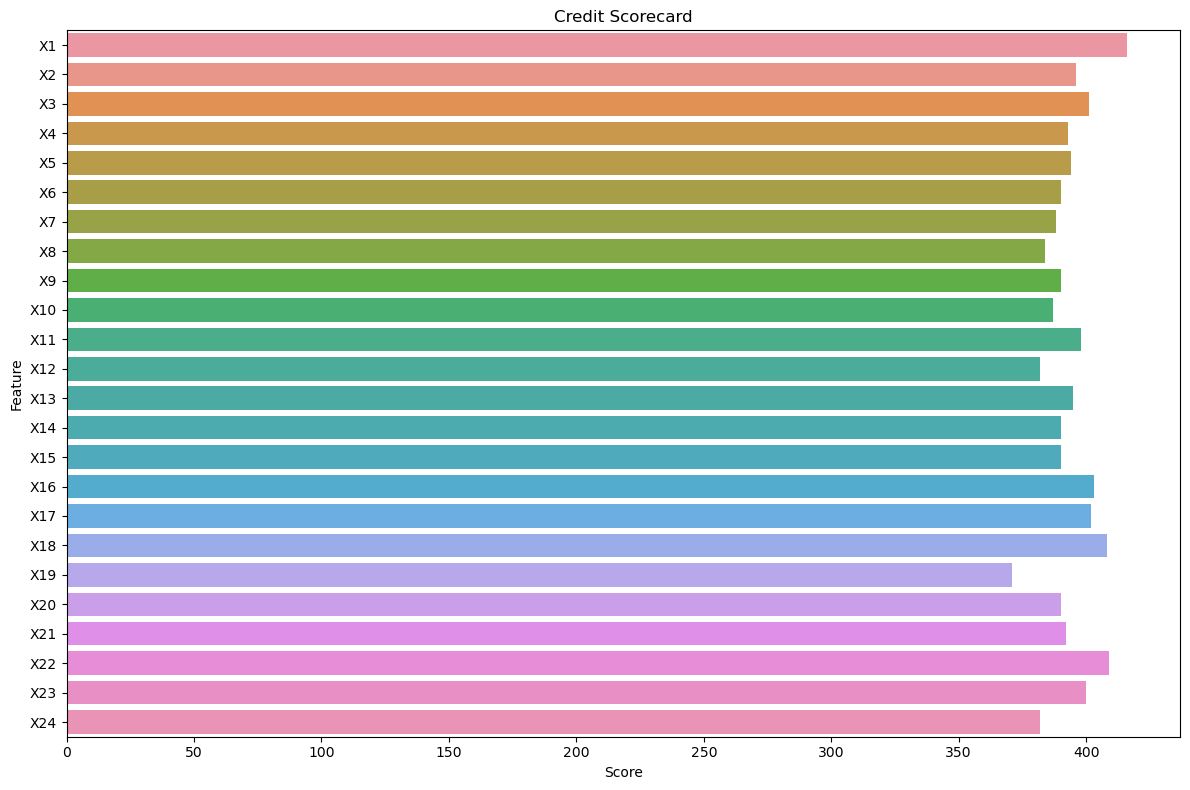

d:\ProgramData\anaconda3\envs\pyTorchgpuEnv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


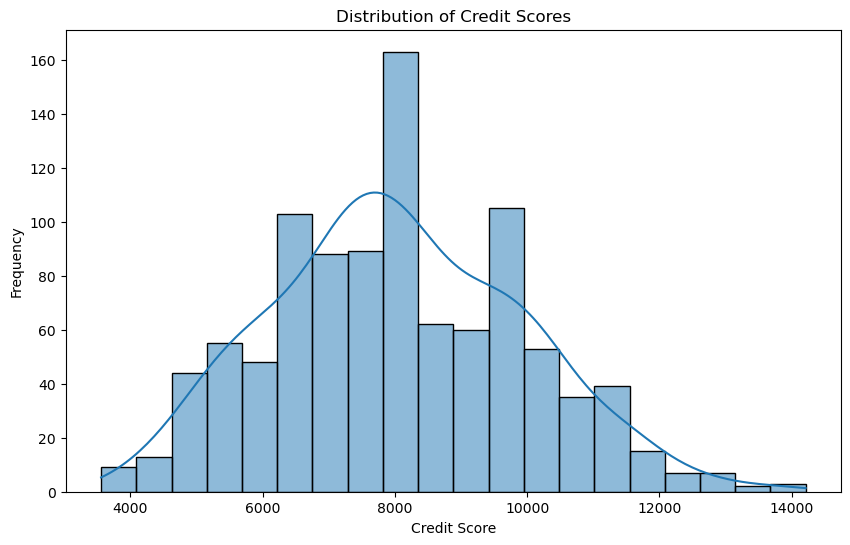

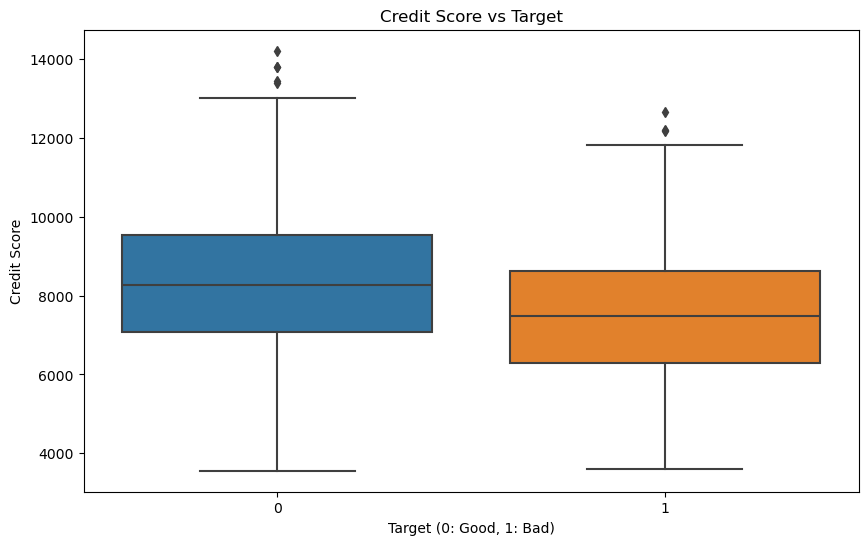

In [ ]:

# 10. 可视化评分卡
plt.figure(figsize=(12, 8))
sns.barplot(x=list(scorecard.values()), y=list(scorecard.keys()))
plt.title('Credit Scorecard')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.tight_layout()
# 保存图片
plt.savefig('../Data/Q2_credit_scorecard.png')
plt.show()

# 11. 可视化信用得分分布
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Score'], kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
# 保存图片
plt.savefig('../Data/Q2_credit_score_distribution.png')
plt.show()

# 12. 信用得分与目标变量的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='Y(1=default, 0=non-default)', y='Credit_Score', data=df)
plt.title('Credit Score vs Target')
plt.xlabel('Target (0: Good, 1: Bad)')
plt.ylabel('Credit Score')
# 保存图片
plt.savefig('../Data/Q2_credit_score_vs_target.png')
plt.show()



### 得分保存到一个csv文件中方便后续问题直接调用

In [ ]:
# 13. 打印信用得分的描述性统计
print("\nCredit Score Statistics:")
print(df['Credit_Score'].describe())

# 14. 保存结果
df.to_csv('../Data/Q2_german_credit_data_with_scores.csv', index=False)
print("\nResults saved to 'german_credit_data_with_scores.csv'")

# 15. 打印评分卡
print("\nScorecard:")
for feature, score in sorted(scorecard.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score}")


Credit Score Statistics:
count     1000.000000
mean      8043.058000
std       1915.254335
min       3558.000000
25%       6709.000000
50%       7899.500000
75%       9458.250000
max      14211.000000
Name: Credit_Score, dtype: float64

Results saved to 'german_credit_data_with_scores.csv'

Scorecard:
X1: 416
X22: 409
X18: 408
X16: 403
X17: 402
X3: 401
X23: 400
X11: 398
X2: 396
X13: 395
X5: 394
X4: 393
X21: 392
X6: 390
X9: 390
X14: 390
X15: 390
X20: 390
X7: 388
X10: 387
X8: 384
X12: 382
X24: 382
X19: 371
